<a href="https://colab.research.google.com/github/bukenalen30/UAS-BIG-DATA-MINING/blob/main/22_11_5128_Zenic_Belpha_Alensy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools



In [10]:
# Import the necessary module for file uploads in Google Colab
from google.colab import files

#load dataset
uploaded = files.upload()

Saving heart.csv to heart.csv


In [11]:
# Baca dataset
data = pd.read_csv("heart.csv")

In [12]:
# Data preprocessing
# Tampilkan informasi dataset
print("Dataset Info:")
print(data.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


In [13]:
# Exploratory Data Analysis (EDA)
print("\nStatistik deskriptif:")
data.describe()


Statistik deskriptif:


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


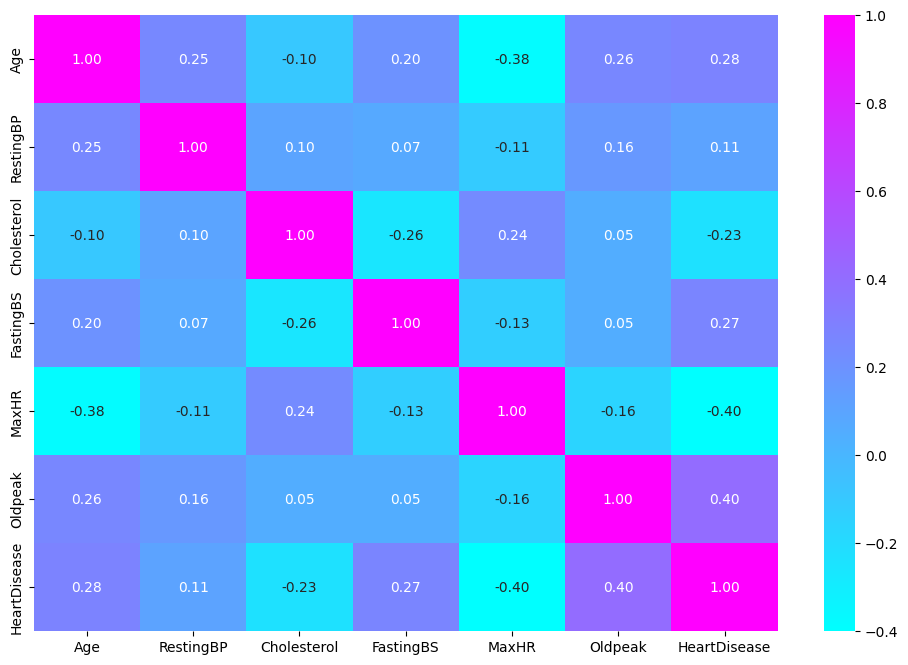

In [22]:
# Korelasi antar kolom numerik
# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=np.number)
corr = numeric_data.corr()

# Visualisasi dengan heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='cool', fmt='.2f')
plt.show()

In [23]:
print("\nCek jumlah data tiap kelas:")
print(data['HeartDisease'].value_counts())


Cek jumlah data tiap kelas:
HeartDisease
1    508
0    410
Name: count, dtype: int64


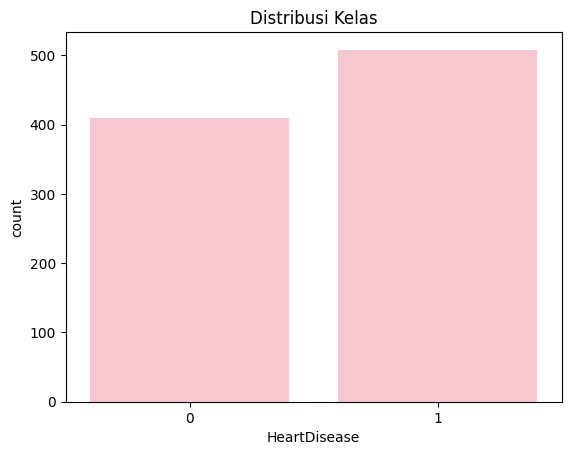

In [24]:
# Visualisasi distribusi kelas
sns.countplot(x='HeartDisease', data=data, color='pink')
plt.title('Distribusi Kelas')
plt.show()

In [25]:
# Memilih kolom numerik untuk scaling
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

In [26]:
# Inisialisasi Min-Max Scaler
scaler = MinMaxScaler()

# Melakukan scaling pada kolom numerik
data_scaled = data.copy()
data_scaled[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [27]:
# Menampilkan hasil setelah scaling
print("\nInformasi dataset setelah preprocessing:")
data.head()


Informasi dataset setelah preprocessing:


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [28]:
# Menentukan fitur dan label
X = data_scaled.drop(columns=['HeartDisease'])  # Replace 'Outcome' with the actual target column name
y = data_scaled['HeartDisease']

In [32]:
# Import necessary libraries
!pip install imbalanced-learn
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

# Assuming you have your data loaded into the 'data' DataFrame

# Separate features and target
X = data.drop(columns=['HeartDisease'])
y = data['HeartDisease']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Apply Label Encoding to categorical columns
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("\nDistribusi kelas setelah SMOTE:")
print(pd.Series(y_resampled).value_counts())


Distribusi kelas setelah SMOTE:
HeartDisease
0    508
1    508
Name: count, dtype: int64


<ipython-input-33-fda3fee6e925>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled, palette=['#FFC0CB', '#FFB6C1'])


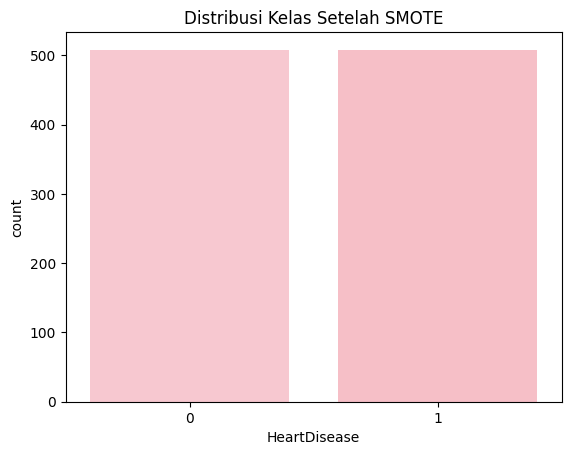

In [33]:
# Visualisasi distribusi kelas setelah SMOTE
sns.countplot(x=y_resampled, palette=['#FFC0CB', '#FFB6C1'])
plt.title('Distribusi Kelas Setelah SMOTE')
plt.show()


In [34]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
print(f"len(Xtrain)\n{len(X_train)}\n")
print(f"len(Xtest)\n{len(X_test)}\n")

len(Xtrain)
812

len(Xtest)
204



In [ ]:
# Encode categorical features (if any)
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Feature-target split
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 3. Model training
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# 4. Model evaluation
y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Feature importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print("\nFeature Importances:\n", feature_importances)

Accuracy: 0.875
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.84      0.86        82
           1       0.88      0.90      0.89       102

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.88      0.87       184

Confusion Matrix:
 [[69 13]
 [10 92]]

Feature Importances:
            Feature  Importance
10        ST_Slope    0.252837
4      Cholesterol    0.115252
7            MaxHR    0.113833
9          Oldpeak    0.110641
2    ChestPainType    0.105808
8   ExerciseAngina    0.080912
0              Age    0.076545
3        RestingBP    0.067069
1              Sex    0.031110
6       RestingECG    0.024690
5        FastingBS    0.021302


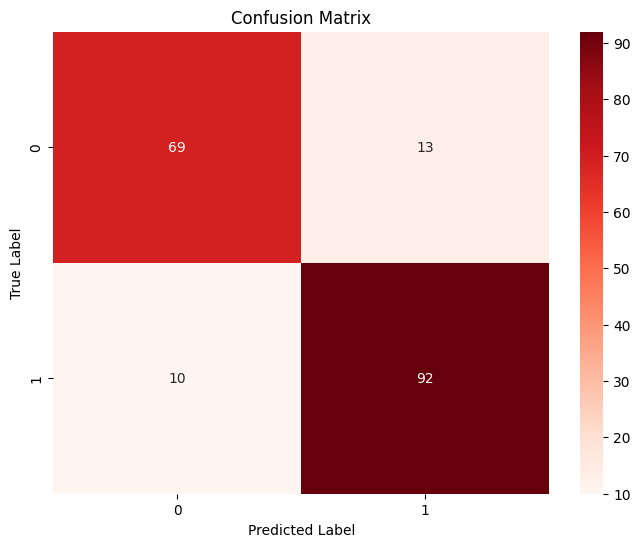

In [ ]:
# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Buat visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
